# **O que é bitcoin?** <p>
O bitcoin é uma moeda virtual – a primeira criada no mundo – e pode ser usado para a compra de serviços, produtos e quaisquer outros itens em estabelecimentos que aceitem ser pagos com ele.



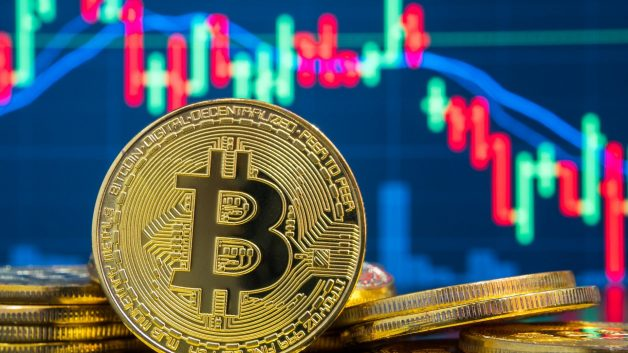

# **Base para baixar**
[Link para baixar os dados](https://docs.google.com/spreadsheets/d/1tvU_z_ZiXzBpS4XAb9DrikNsHFahI33S/edit?usp=sharing&ouid=101707831224147120634&rtpof=true&sd=true)

In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Libs para utilizar o Plotly
import plotly.express as px
import plotly.graph_objects as dash

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [17]:
# Lendo a base de dados
base_dados = pd.read_csv(r"C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\BTC-USD.csv")
base_dados.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-28,1317.739990,1331.280029,1292.369995,1316.479980,1316.479980,5.274890e+08
1,2017-04-29,1317.839966,1327.199951,1315.209961,1321.790039,1321.790039,4.227060e+08
2,2017-04-30,1321.869995,1347.910034,1314.920044,1347.890015,1347.890015,4.131150e+08
3,2017-05-01,1348.300049,1434.319946,1348.300049,1421.599976,1421.599976,7.136240e+08
4,2017-05-02,1421.030029,1473.900024,1415.689941,1452.819946,1452.819946,4.773380e+08
5,2017-05-03,1453.780029,1492.770020,1447.489990,1490.089966,1490.089966,5.837960e+08
6,2017-05-04,1490.719971,1608.910034,1490.719971,1537.670044,1537.670044,9.335490e+08
7,2017-05-05,1540.869995,1618.030029,1530.310059,1555.449951,1555.449951,9.460360e+08
8,2017-05-06,1556.810059,1578.800049,1542.500000,1578.800049,1578.800049,5.825300e+08
9,2017-05-07,1579.469971,1596.719971,1559.760010,1596.709961,1596.709961,1.080030e+09


In [18]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2558 non-null   object 
 1   Open       2557 non-null   float64
 2   High       2557 non-null   float64
 3   Low        2557 non-null   float64
 4   Close      2557 non-null   float64
 5   Adj Close  2557 non-null   float64
 6   Volume     2557 non-null   float64
dtypes: float64(6), object(1)
memory usage: 140.0+ KB


In [19]:
base_dados['Date'] = pd.to_datetime(base_dados['Date'], errors='coerce')

In [20]:
# Setando o index como a data
base_dados.set_index('Date', inplace=True)
base_dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-28,1317.739990,1331.280029,1292.369995,1316.479980,1316.479980,527488992.0
2017-04-29,1317.839966,1327.199951,1315.209961,1321.790039,1321.790039,422705984.0
2017-04-30,1321.869995,1347.910034,1314.920044,1347.890015,1347.890015,413115008.0
2017-05-01,1348.300049,1434.319946,1348.300049,1421.599976,1421.599976,713624000.0
2017-05-02,1421.030029,1473.900024,1415.689941,1452.819946,1452.819946,477337984.0


## Usando o Plotly Express

In [21]:
# Gráfico de linhas
fig = px.line(base_dados, y='Close')

# Fazendo o plot
fig.show()

## Usando o graph objects

In [23]:
# Gerando médias móveis

media_movel = base_dados['Close'].rolling(5).mean()
media_tendencia = base_dados['Close'].rolling(30).mean()

In [27]:
# Criando o dashboard

# Criando uma figura
figura = dash.Figure()

# Adicionando o primeiro eixo:
figura.add_trace(
    dash.Scatter(
        x=base_dados.index,
        y=base_dados['Close'],
        mode='lines',
        name='Fechamento',
        marker_color='#ff7f0e',
        opacity=0.5
    )
)

# Adicionando a média móvel:
figura.add_trace(
    dash.Scatter(
        x=base_dados.index,
        y=media_movel,
        mode='lines',
        name='Média Móvel',
        marker_color='#d62728',
        opacity=0.5
    )
)

# Adicionando a média tendência:
figura.add_trace(
    dash.Scatter(
        x=base_dados.index,
        y=media_tendencia,
        mode='lines',
        name='Média Tendência',
        marker_color='#2ca02c'
    )
)

# Ajustes no layout
figura.update_layout(
    
    # Título
    title='Análise do fechamento do Bitcion',
    # Tamanho
    titlefont_size=20,
    
    # Ajustando o eixo x
    xaxis=dict(
        title='Período Histórico',
        titlefont_size=14,
        tickfont_size=10
    ),
    
    # Ajustando o eixo y
    yaxis=dict(
        title='Preço fechamento ($)',
        titlefont_size=14,
        tickfont_size=10
    ),
    
    # Parâmetros para a legenda
    legend = dict(
        x=1,
        y=1,
        bgcolor='rgba(255,255,255,0)',
        bordercolor='rgba(255,255,255,0)'
    )
)